<a href="https://colab.research.google.com/github/in3xes/CAP5610/blob/master/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras import layers,models

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import itertools

In [2]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [3]:
Y_train = train["label"]
X_train = train.drop(labels=["label"], axis=1)

X_train = X_train/255
test = test/255

X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)

X_train, X_val, Y_train, Y_val = train_test_split(X_train,
                                                  Y_train,
                                                  test_size=0.1,
                                                  random_state=2)

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(filters=64,
                        kernel_size=(3,3),
                        activation='relu',
                        input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=128,
                        kernel_size=(3,3),
                        activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=128,
                        kernel_size=(3,3),
                        activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128,
                       activation='relu'))
model.add(layers.Dense(10,
                       activation='softmax'))

In [5]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=65)

Epoch 1/20
582/582 [==============================] - 85s 146ms/step - loss: 0.1768 - accuracy: 0.9438
Epoch 2/20
582/582 [==============================] - 86s 147ms/step - loss: 0.0456 - accuracy: 0.9856
Epoch 3/20
582/582 [==============================] - 86s 147ms/step - loss: 0.0298 - accuracy: 0.9913
Epoch 4/20
582/582 [==============================] - 85s 147ms/step - loss: 0.0214 - accuracy: 0.9936
Epoch 5/20
582/582 [==============================] - 86s 147ms/step - loss: 0.0160 - accuracy: 0.9952
Epoch 6/20
582/582 [==============================] - 85s 147ms/step - loss: 0.0115 - accuracy: 0.9962
Epoch 7/20
582/582 [==============================] - 86s 147ms/step - loss: 0.0099 - accuracy: 0.9968
Epoch 8/20
582/582 [==============================] - 85s 146ms/step - loss: 0.0094 - accuracy: 0.9970
Epoch 9/20
582/582 [==============================] - 85s 146ms/step - loss: 0.0069 - accuracy: 0.9980
Epoch 10/20
582/582 [==============================] - 85s 146ms/step - l

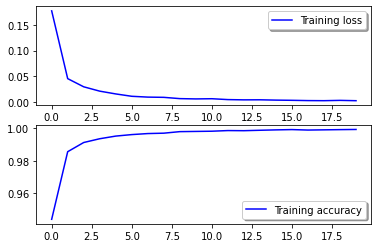

In [18]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)

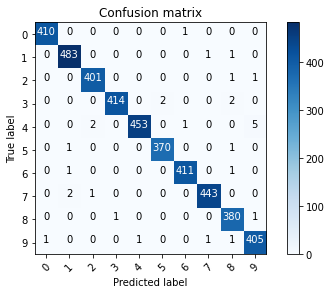

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [11]:
results = model.predict(test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("output.csv",index=False)